In [1]:
import numpy as np
import pandas as pd
import sklearn
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

In [2]:
df = pd.read_csv("churn.csv")
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [3]:
print(df.shape)
df.columns.values

(7043, 21)


array(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
       'PaperlessBilling', 'PaymentMethod', 'MonthlyCharges',
       'TotalCharges', 'Churn'], dtype=object)

#### Checking for Missing Values

We explore the data for any missing values in the DataFrame. We can see that all fields have 0 missing values instances.


In [4]:
df.isna().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

#### Summary Statistics

Generating summary statistics for numerical columns, including count, mean, standard deviation, and percentiles


In [5]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


#### Exploring field distribution

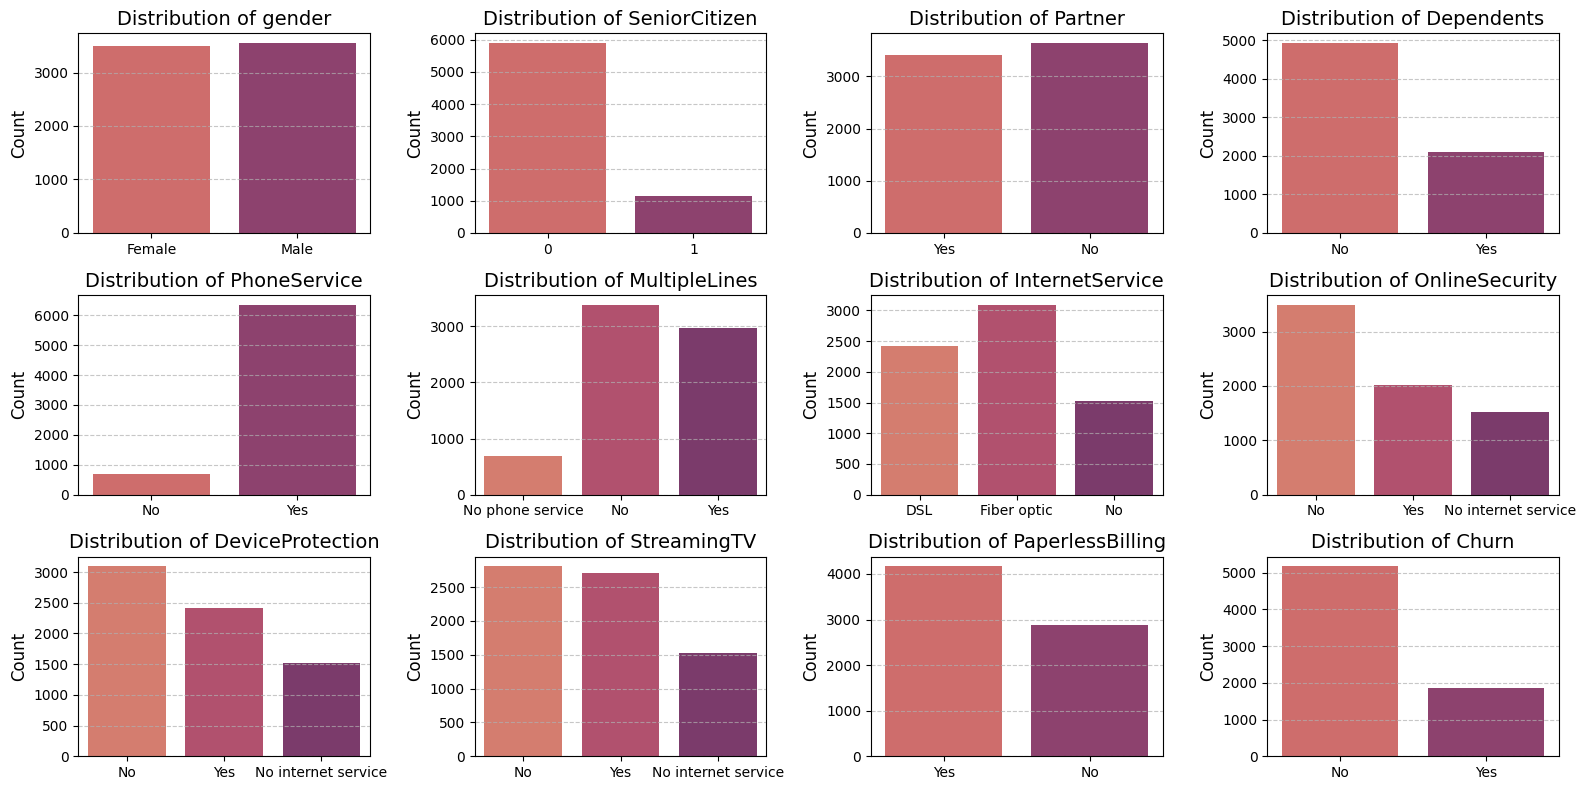

In [6]:
columns_to_plot = ['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'DeviceProtection', 'StreamingTV', 'PaperlessBilling','Churn']
fig, axes = plt.subplots(3, 4, figsize=(16, 8))  
axes = axes.flatten()

for i, col in enumerate(columns_to_plot):
    sns.countplot(data=df, x=col, hue=col, ax=axes[i], palette='flare', legend=False)
    axes[i].set_title(f'Distribution of {col}', fontsize=14)
    axes[i].set_xlabel('')
    axes[i].set_ylabel('Count', fontsize=12)
    axes[i].grid(True, axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()

plt.show()

#### Monthly and Total Charges 

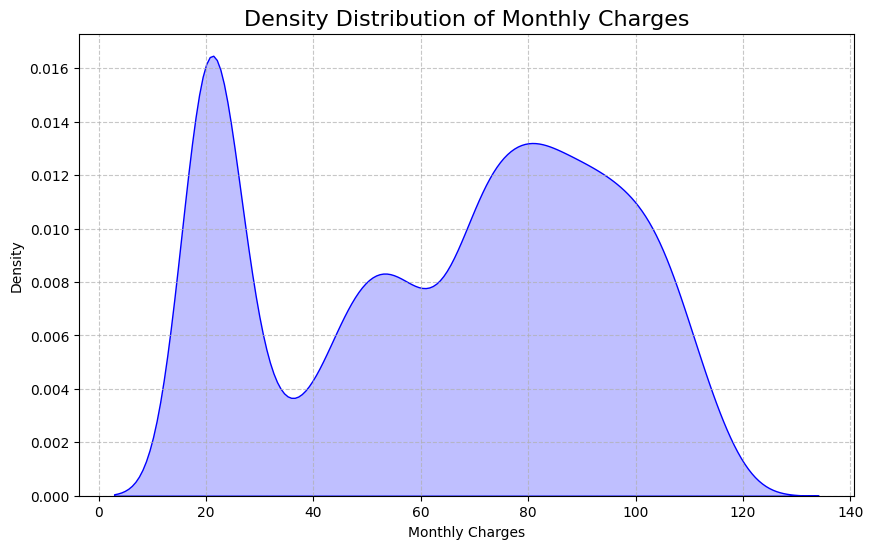

In [7]:
plt.figure(figsize=(10, 6))
sns.kdeplot(data=df, x='MonthlyCharges', fill=True, color='blue')
plt.title('Density Distribution of Monthly Charges', fontsize=16)
plt.xlabel('Monthly Charges')
plt.ylabel('Density')
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()

In [8]:
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')

In [9]:
nan_values = df['TotalCharges'].isna().sum()

In [10]:
nan_values

11

In [11]:
if nan_values > 0:
    df['TotalCharges'].fillna(df['TotalCharges'].mean(), inplace=True)

In [12]:
mean_total_charges = df['TotalCharges'].mean()
median_total_charges = df['TotalCharges'].median()
mode_total_charges = df['TotalCharges'].mode()[0]  # mode() returns a Series, so take the first value
percentiles_total_charges = df['TotalCharges'].quantile([0.25, 0.5, 0.75, 0.95])

print(f"Mean of Total Charges: {mean_total_charges:.2f}")
print(f"Median of Total Charges: {median_total_charges:.2f}")
print(f"Mode of Total Charges: {mode_total_charges:.2f}")
print("Percentiles of Total Charges:")
print(percentiles_total_charges)

Mean of Total Charges: 2283.30
Median of Total Charges: 1400.55
Mode of Total Charges: 20.20
Percentiles of Total Charges:
0.25     402.225
0.50    1400.550
0.75    3786.600
0.95    6921.025
Name: TotalCharges, dtype: float64


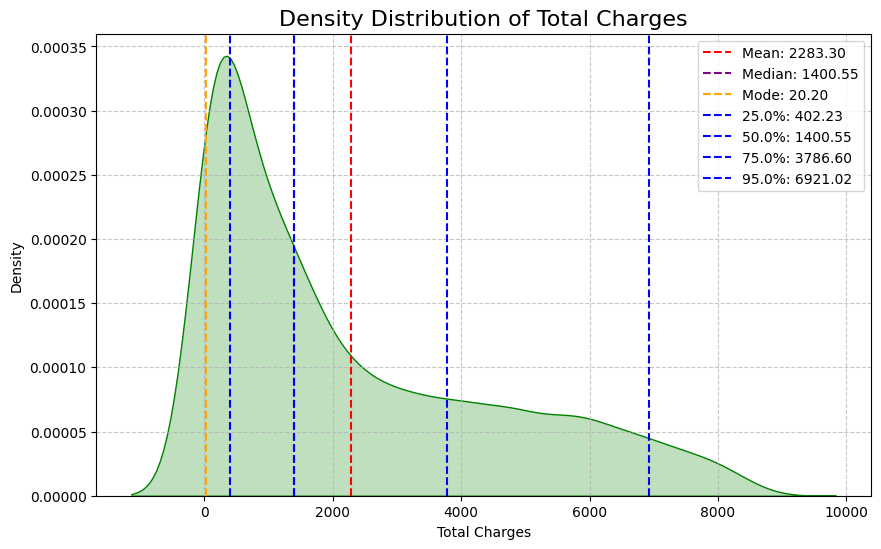

In [13]:
plt.figure(figsize=(10, 6))
sns.kdeplot(data=df, x='TotalCharges', fill=True, color='green')
plt.title('Density Distribution of Total Charges', fontsize=16)
plt.xlabel('Total Charges')
plt.ylabel('Density')

# Annotating the plot with statistics
plt.axvline(mean_total_charges, color='red', linestyle='--', label=f'Mean: {mean_total_charges:.2f}')
plt.axvline(median_total_charges, color='purple', linestyle='--', label=f'Median: {median_total_charges:.2f}')
plt.axvline(mode_total_charges, color='orange', linestyle='--', label=f'Mode: {mode_total_charges:.2f}')
for percentile, value in percentiles_total_charges.items():
    plt.axvline(value, color='blue', linestyle='--', label=f'{percentile*100}%: {value:.2f}')

plt.legend()
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()

#### Key Insights from the Density Distributions

- **Total Charges**: Highly right-skewed with most customers having low total charges. A few high-value outliers pull the mean above the median
- **Monthly Charges**: Bimodal distribution suggests two main customer segments, possibly indicating different service tiers
- **Revenue Distribution**: Majority of revenue likely comes from a smaller group with higher total charges
- **Customer Behavior**: Many customers may be new or have minimal charges, indicating recent sign-ups or promotional plans

73.4630129206304 % of customers stayed in the company
26.536987079369588 % of customers left with the company


<AxesSubplot: xlabel='gender', ylabel='count'>

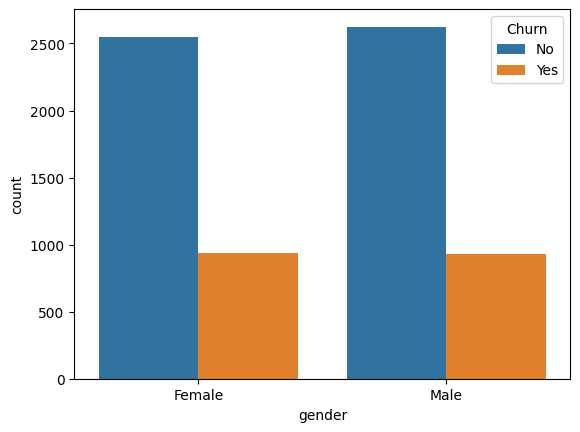

In [14]:
numRetained = df[df.Churn == 'No'].shape[0]
numChurned = df[df.Churn == 'Yes'].shape[0]

# print the percentage of customers that stayed
print(numRetained/(numRetained + numChurned) * 100,'% of customers stayed in the company')
# peint the percentage of customers that left
print(numChurned/(numRetained + numChurned) * 100, '% of customers left with the company')

sns.countplot(x ='gender', hue='Churn', data=df)

<AxesSubplot: xlabel='InternetService', ylabel='count'>

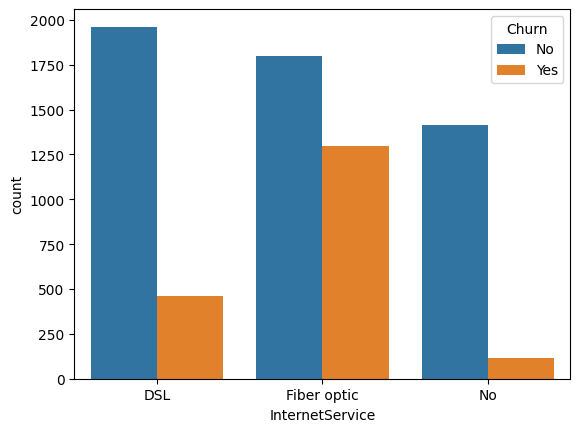

In [15]:
sns.countplot(x='InternetService', hue='Churn', data=df)

array([<AxesSubplot: title={'center': 'tenure'}>,
       <AxesSubplot: title={'center': 'MonthlyCharges'}>], dtype=object)

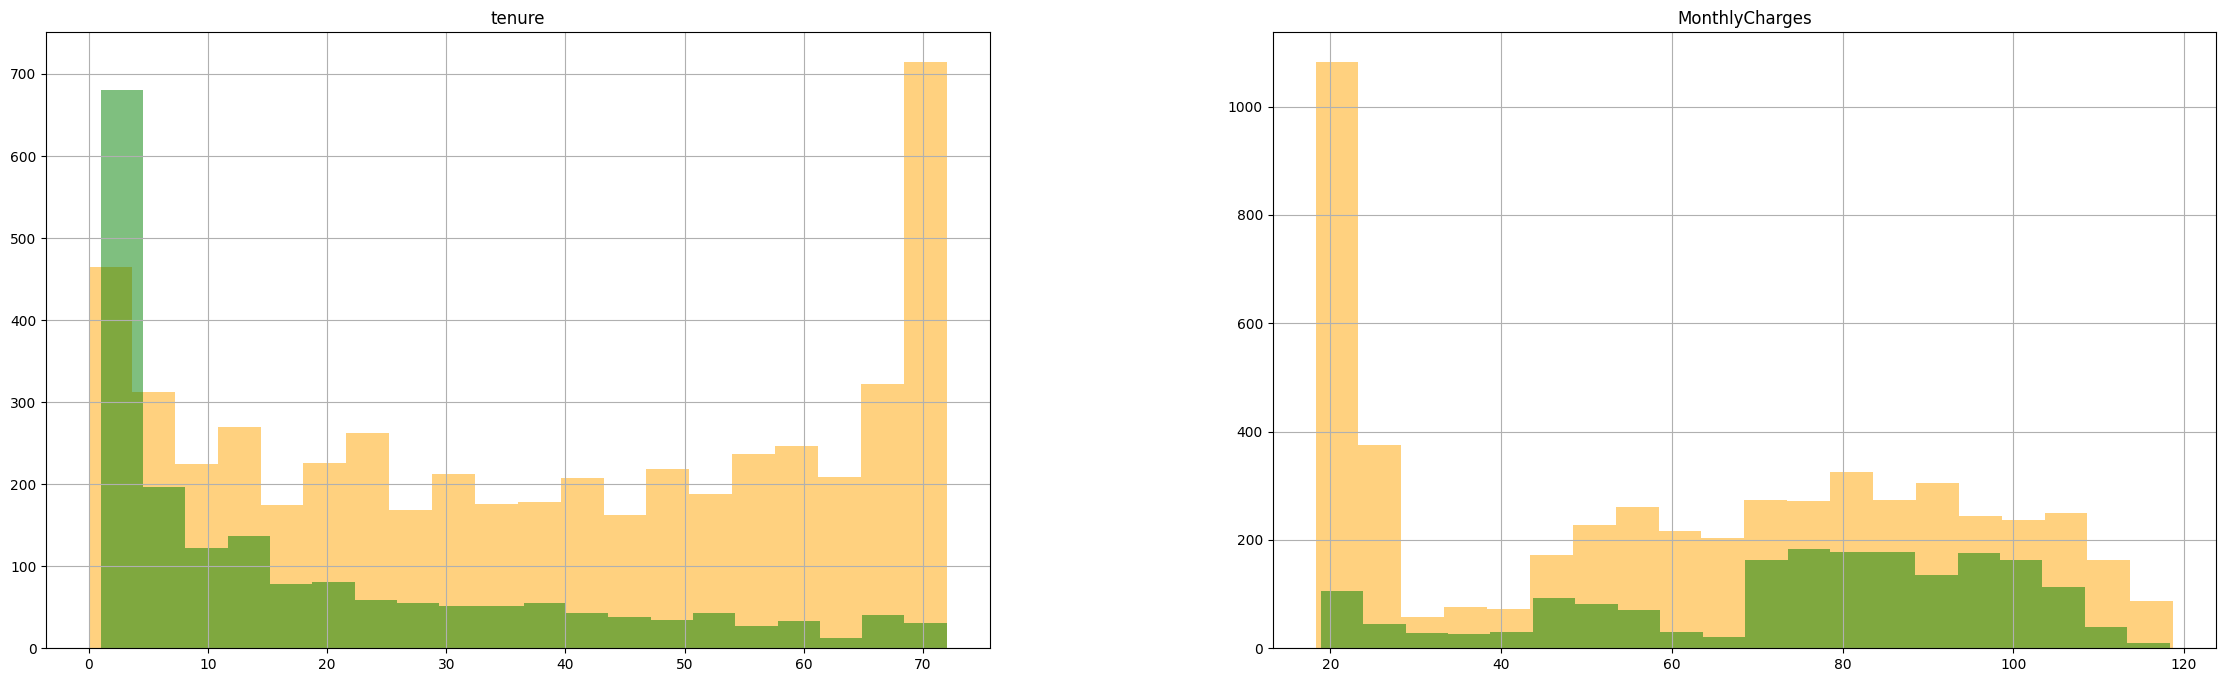

In [16]:
numericFeatures = ['tenure', 'MonthlyCharges']
fig, ax = plt.subplots(1,2, figsize=(28, 8))
df[df.Churn == "No"][numericFeatures].hist(bins=20, color='orange', alpha=0.5, ax=ax)
df[df.Churn == "Yes"][numericFeatures].hist(bins=20, color='green', alpha=0.5, ax=ax)

## Key Insights from the Histograms

1. **Tenure and Churn**:
   - **High Churn in Early Tenure**: Customers with short tenure (near 0 months) show a higher likelihood of churn, indicating that new customers are more prone to leaving.
   - **Low Churn with Long Tenure**: Churn rates drop significantly for customers with tenure over 60 months, suggesting that long-term customers are more likely to stay.
   - **Actionable Insight**: Implement retention strategies targeted at customers with low tenure to reduce churn.

2. **Monthly Charges and Churn**:
   - **High Churn in Low Monthly Charges**: Higher churn is observed among customers with lower monthly charges (~$20), possibly indicating dissatisfaction with lower-tier plans.
   - **Even Distribution Across Charges**: Churn is more evenly distributed across various charge levels, but customers with higher monthly charges ($60-$80) show relatively lower churn.
   - **Actionable Insight**: Review pricing strategies and consider enhancing lower-tier plans to improve retention.


### Selecting and training the model

#### Choice

We choose a Logistic Regression model because we are aiming to predict a binary outcome `churn` or `no churn`. Logistic Regression predicts the probability of an outcome belonging to a particular class.

I have seen some people using Linear Regression for this dataset, which **does not make much sense** for probability predictions. 

Logistic Regression also offers a good understanding of the model and its parameters as it presents a direct relationship between each feature and the probability of the outcome.
It's efficient for a small dataset like ours. 

$$\text{Log-odds}(p) = \log\left(\frac{p}{1-p}\right) = \beta_0 + \beta_1 \times X_1 + \beta_2 \times X_2 + \dots + \beta_N \times X_N$$


- $p$ is the probability of the event occurring in our case churn or no churn.
- The term $\log\left(\frac{p}{1-p}\right)$ represents the log-odds.
- $\beta_0$ is the intercept of the model.
- $X_1, X_2, \dots, X_N$ are the feature variables.
- $\beta_1, \beta_2, \dots, \beta_N$ are the coefficients corresponding to each feature.



#### Encoding all non numeric fields

In [29]:
cleanDF = df.drop('customerID', axis=1) # non-relevant for our model
# Convert all the non-numeric columns to numeric
for column in cleanDF.columns:
    if column == 'TotalCharges':
        continue
    
    if np.issubdtype(cleanDF[column].dtype, np.number):
        continue
    
    else:
        # Apply label encoding if 2 or fewer distinct values
        cleanDF[column] = LabelEncoder().fit_transform(cleanDF[column])

We check that we have indeed encoded all 

In [30]:
cleanDF.dtypes

gender                int32
SeniorCitizen         int64
Partner               int32
Dependents            int32
tenure                int64
PhoneService          int32
MultipleLines         int32
InternetService       int32
OnlineSecurity        int32
OnlineBackup          int32
DeviceProtection      int32
TechSupport           int32
StreamingTV           int32
StreamingMovies       int32
Contract              int32
PaperlessBilling      int32
PaymentMethod         int32
MonthlyCharges      float64
TotalCharges        float64
Churn                 int32
dtype: object

## Scale the data

In [31]:
cleanDF.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0,0,1,0,1,0,1,0,0,2,0,0,0,0,0,1,2,29.85,29.85,0
1,1,0,0,0,34,1,0,0,2,0,2,0,0,0,1,0,3,56.95,1889.50,0
2,1,0,0,0,2,1,0,0,2,2,0,0,0,0,0,1,3,53.85,108.15,1
3,1,0,0,0,45,0,1,0,2,0,2,2,0,0,1,0,0,42.30,1840.75,0
4,0,0,0,0,2,1,0,1,0,0,0,0,0,0,0,1,2,70.70,151.65,1


Why Standardize the Data?

Improved Model Performance: Many machine learning models, including logistic regression, perform better and converge faster when the input features are standardized. This is because standardization ensures that all features contribute equally to the model, preventing features with larger scales from dominating the learning process.

Optimization Stability: Standardized features often lead to more stable and faster convergence of the optimization algorithms used in models like logistic regression, neural networks, and support vector machines.

In [ ]:
x = cleanDF.drop('Churn', axis=1)

y = cleanDF['Churn']
x = StandardScaler().fit_transform(x) # standardizes features by setting mean to 0 and std to 1  

In [58]:
x = cleanDF.drop('Churn', axis=1)

y = cleanDF['Churn']
x = StandardScaler().fit_transform(x) # standardizes features by setting mean to 0 and std to 1  

cleanDF['TotalCharges'] = pd.to_numeric(cleanDF['TotalCharges'], errors='coerce')

# Check if there are any NaN values (which might result from conversion of empty strings)
nan_values = cleanDF['TotalCharges'].isna().sum()

if nan_values > 0:
    cleanDF['TotalCharges'].fillna(cleanDF['TotalCharges'].mean(), inplace=True)

In [46]:
print(x)

[[-1.00955867 -0.43991649  1.03453023 ...  0.39855772 -1.16032292
  -0.99497138]
 [ 0.99053183 -0.43991649 -0.96662231 ...  1.33486261 -0.25962894
  -0.17387565]
 [ 0.99053183 -0.43991649 -0.96662231 ...  1.33486261 -0.36266036
  -0.96039939]
 ...
 [-1.00955867 -0.43991649  1.03453023 ...  0.39855772 -1.1686319
  -0.85518222]
 [ 0.99053183  2.27315869  1.03453023 ...  1.33486261  0.32033821
  -0.87277729]
 [ 0.99053183 -0.43991649 -0.96662231 ... -1.47405205  1.35896134
   2.01391739]]


#### Splitting dataset for training 

In [48]:
xtrain, xtest, ytrain, ytest = train_test_split(x,y, test_size=0.2, random_state=42)

In [49]:
model = LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)
# Train the model
model.fit(xtrain, ytrain)

LogisticRegression()

In [50]:
predictions = model.predict(xtest)

# print the predictions
print(predictions)

[1 0 0 ... 0 0 1]


In [52]:
print(classification_report(ytest, predictions))

              precision    recall  f1-score   support

           0       0.86      0.90      0.88      1036
           1       0.68      0.58      0.63       373

    accuracy                           0.82      1409
   macro avg       0.77      0.74      0.75      1409
weighted avg       0.81      0.82      0.81      1409



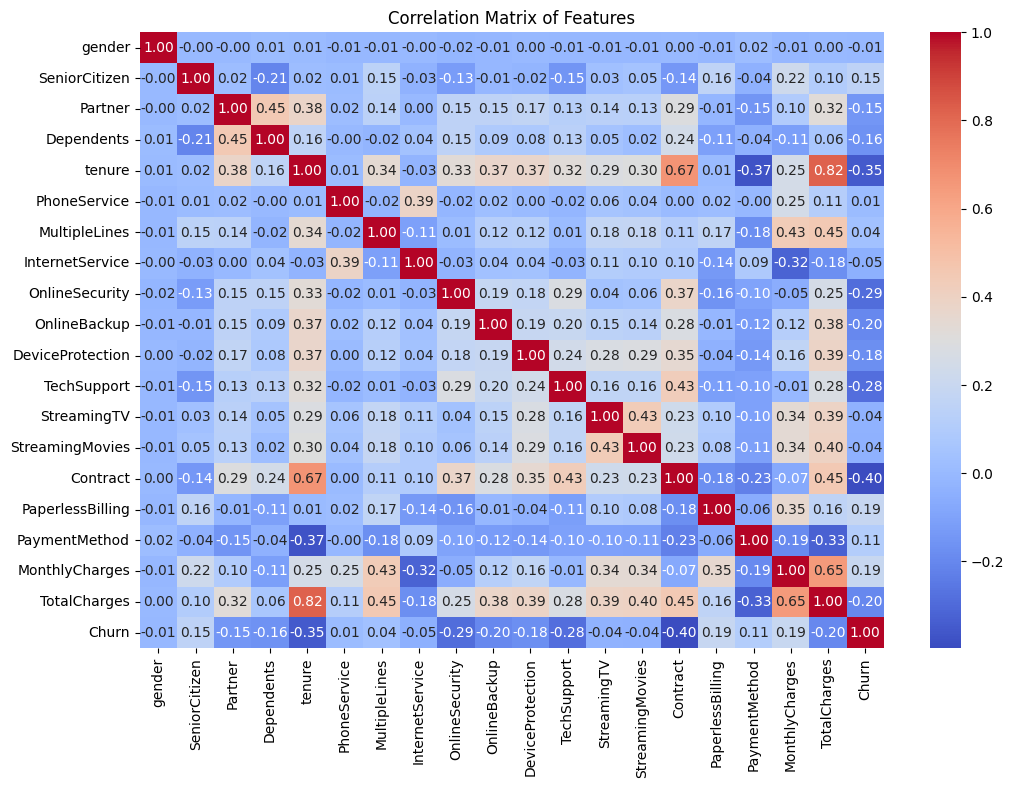

In [53]:
plt.figure(figsize=(12, 8))
correlation_matrix = cleanDF.corr()
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm')
plt.title('Correlation Matrix of Features')
plt.show()

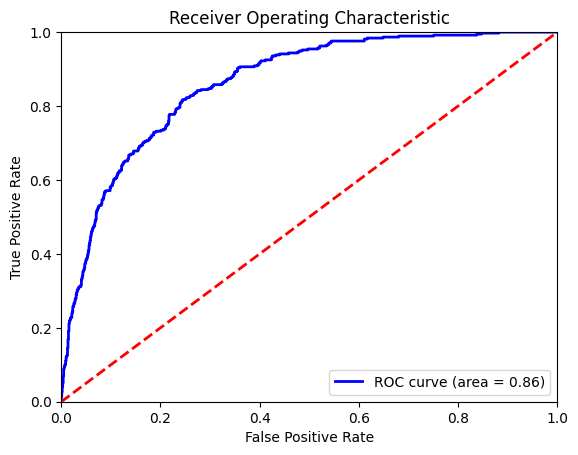

In [54]:
from sklearn.metrics import roc_curve, auc

# Predicting probabilities
y_prob = model.predict_proba(xtest)[:, 1]

# Calculating ROC curve
fpr, tpr, thresholds = roc_curve(ytest, y_prob)
roc_auc = auc(fpr, tpr)

# Plotting the ROC curve
plt.figure()
plt.plot(fpr, tpr, color='blue', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='red', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()


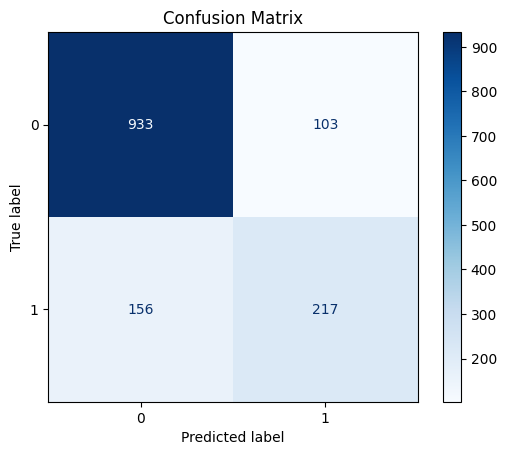

In [55]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Generate the confusion matrix
cm = confusion_matrix(ytest, predictions)

# Display the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap='Blues')
plt.title('Confusion Matrix')
plt.show()


In [56]:
print(classification_report(ytest, predictions))

              precision    recall  f1-score   support

           0       0.86      0.90      0.88      1036
           1       0.68      0.58      0.63       373

    accuracy                           0.82      1409
   macro avg       0.77      0.74      0.75      1409
weighted avg       0.81      0.82      0.81      1409



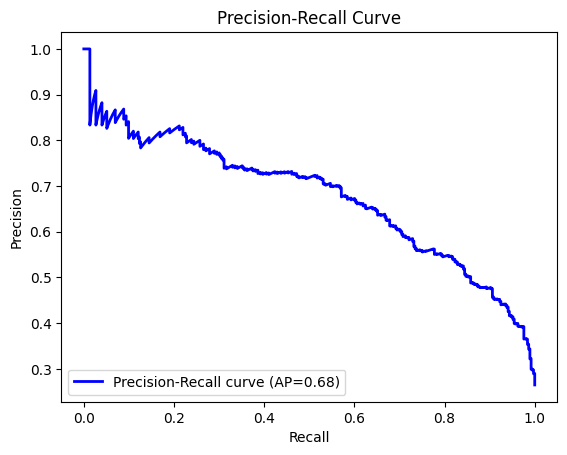

In [44]:
from sklearn.metrics import precision_recall_curve, average_precision_score

# Calculate precision and recall
precision, recall, thresholds = precision_recall_curve(ytest, y_prob)

# Calculate average precision
average_precision = average_precision_score(ytest, y_prob)

# Plot Precision-Recall curve
plt.figure()
plt.plot(recall, precision, color='blue', lw=2, label=f'Precision-Recall curve (AP={average_precision:.2f})')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend(loc="lower left")
plt.show()


C:\Users\pizza\AppData\Local\Temp\ipykernel_24496\2383262939.py:23: MatplotlibDeprecationWarning: Unable to determine Axes to steal space for Colorbar. Using gca(), but will raise in the future. Either provide the *cax* argument to use as the Axes for the Colorbar, provide the *ax* argument to steal space from it, or add *mappable* to an Axes.
  plt.colorbar(sm)


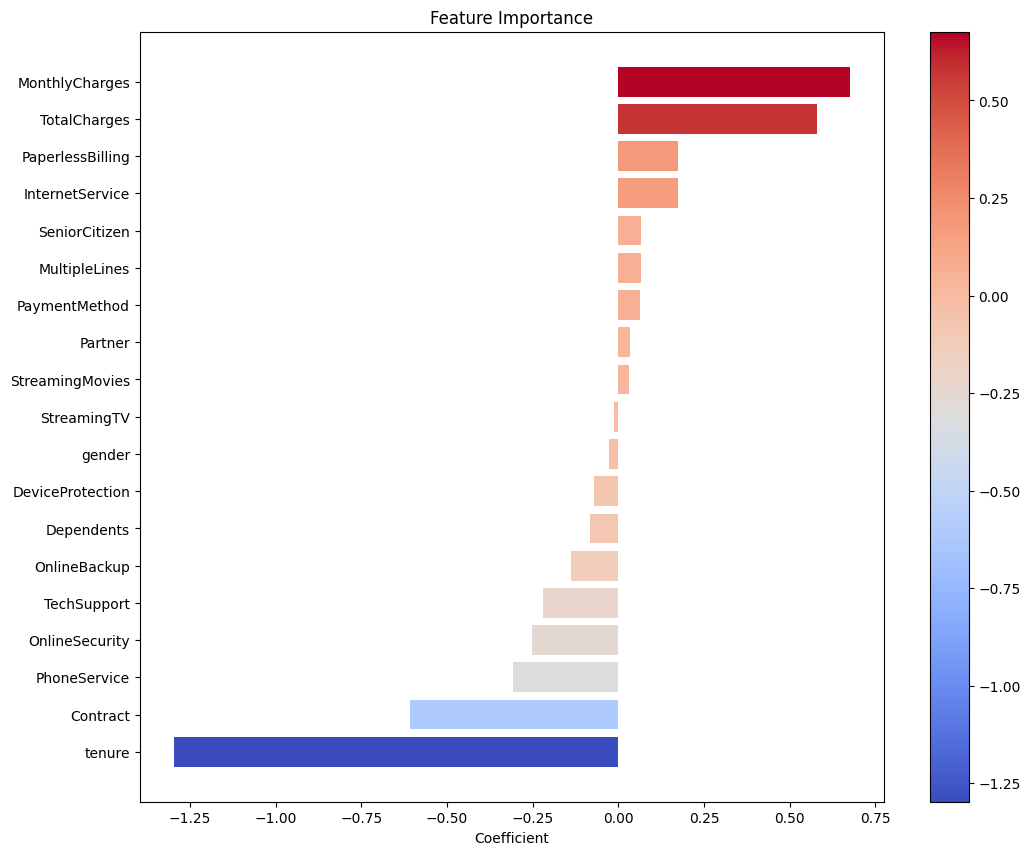

In [45]:
feature_names = df.drop(['customerID', 'Churn'], axis=1).columns

# Extract the coefficients
coefficients = model.coef_[0]

# Create a DataFrame for better visualization
feature_importance = pd.DataFrame({
    'Feature': feature_names,
    'Importance': coefficients
})

# Sort the features by importance
feature_importance = feature_importance.sort_values(by='Importance', ascending=False)

# Create a color palette that varies with the magnitude of the coefficients
norm = plt.Normalize(feature_importance['Importance'].min(), feature_importance['Importance'].max())
sm = plt.cm.ScalarMappable(cmap="coolwarm", norm=norm)
sm.set_array([])

# Plot the feature importance with a color gradient
plt.figure(figsize=(12, 10))
bars = plt.barh(feature_importance['Feature'], feature_importance['Importance'], color=sm.to_rgba(feature_importance['Importance']))
plt.colorbar(sm)

# Add labels and title
plt.xlabel('Coefficient')
plt.title('Feature Importance')

# Invert the y-axis to show the most important features at the top
plt.gca().invert_yaxis()

plt.show()


In [67]:
columns_to_drop = ['StreamingTV', 'gender', 'DeviceProtection', 'StreamingMovies', 'Partner', 'PaymentMethod'
                   , 'MultipleLines', 'SeniorCitizen', 'InternetService', 'PaperlessBilling', 'Dependents'
                   , 'OnlineBackup', 'TechSupport', 'OnlineSecurity', 'PhoneService']

In [72]:
cleanDF = df.drop('customerID', axis=1) # non-relevant for our model
#cleanDF = cleanDF.drop(columns=columns_to_drop)

# Convert all the non-numeric columns to numeric
for column in cleanDF.columns:
    if column == 'TotalCharges':
        continue
    
    if np.issubdtype(cleanDF[column].dtype, np.number):
        continue
    
    else:
        # Apply label encoding if 2 or fewer distinct values
        cleanDF[column] = LabelEncoder().fit_transform(cleanDF[column])

x = cleanDF.drop('Churn', axis=1)

y = cleanDF['Churn']
x = StandardScaler().fit_transform(x) # standardizes features by setting mean to 0 and std to 1  

cleanDF['TotalCharges'] = pd.to_numeric(cleanDF['TotalCharges'], errors='coerce')

# Check if there are any NaN values (which might result from conversion of empty strings)
nan_values = cleanDF['TotalCharges'].isna().sum()

if nan_values > 0:
    cleanDF['TotalCharges'].fillna(cleanDF['TotalCharges'].mean(), inplace=True)



xtrain, xtest, ytrain, ytest = train_test_split(x,y, test_size=0.2, random_state=42)

model = LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l1',
                   random_state=None, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)
# Train the model
model.fit(xtrain, ytrain)

predictions = model.predict(xtest)

print(classification_report(ytest, predictions))


              precision    recall  f1-score   support

           0       0.86      0.90      0.88      1036
           1       0.68      0.58      0.62       373

    accuracy                           0.82      1409
   macro avg       0.77      0.74      0.75      1409
weighted avg       0.81      0.82      0.81      1409



In [71]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, StackingClassifier
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

In [74]:
cleanDF = df.drop('customerID', axis=1) # non-relevant for our model

# Convert all the non-numeric columns to numeric
for column in cleanDF.columns:
    if column == 'TotalCharges':
        continue
    
    if np.issubdtype(cleanDF[column].dtype, np.number):
        continue
    
    else:
        # Apply label encoding if 2 or fewer distinct values
        cleanDF[column] = LabelEncoder().fit_transform(cleanDF[column])

x = cleanDF.drop('Churn', axis=1)
y = cleanDF['Churn']
x = StandardScaler().fit_transform(x)

xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size=0.2, random_state=42)


In [75]:
# Base models
base_models = [
    ('lr', LogisticRegression()),
    ('rf', RandomForestClassifier(n_estimators=100, random_state=42)),
    ('svc', SVC(probability=True, random_state=42)),
    ('dt', DecisionTreeClassifier(random_state=42))
]


In [76]:
meta_model = LogisticRegression()


In [78]:
stacking_model = StackingClassifier(estimators=base_models, final_estimator=meta_model, cv=5)
stacking_model.fit(xtrain, ytrain)

StackingClassifier(cv=5,
                   estimators=[('lr', LogisticRegression()),
                               ('rf', RandomForestClassifier(random_state=42)),
                               ('svc', SVC(probability=True, random_state=42)),
                               ('dt', DecisionTreeClassifier(random_state=42))],
                   final_estimator=LogisticRegression())

In [79]:
predictions = stacking_model.predict(xtest)

# Print classification report
print(classification_report(ytest, predictions))


              precision    recall  f1-score   support

           0       0.85      0.91      0.88      1036
           1       0.69      0.57      0.62       373

    accuracy                           0.82      1409
   macro avg       0.77      0.74      0.75      1409
weighted avg       0.81      0.82      0.81      1409



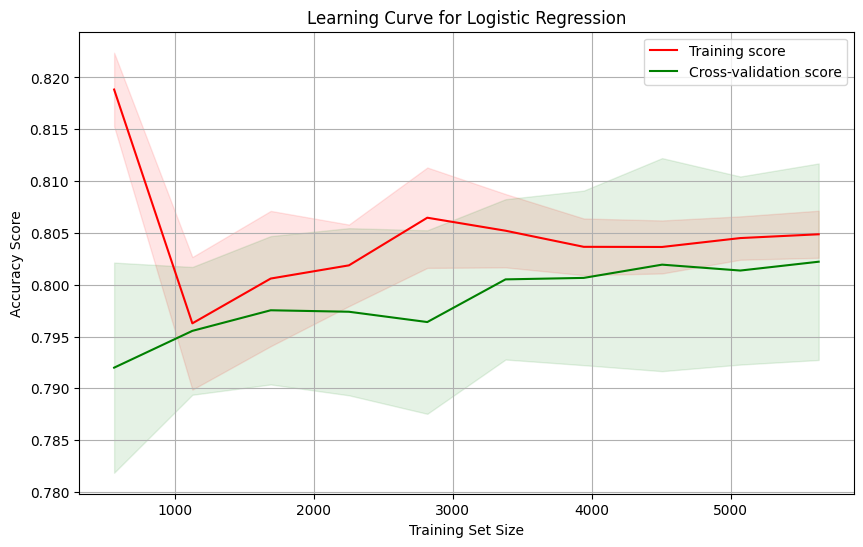

In [81]:
from sklearn.model_selection import learning_curve
train_sizes, train_scores, test_scores = learning_curve(model, x, y, cv=5, n_jobs=-1, train_sizes=np.linspace(0.1, 1.0, 10))

# Calculate the mean and standard deviation for training and test scores
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

# Plot the learning curve
plt.figure(figsize=(10, 6))
plt.plot(train_sizes, train_mean, label="Training score", color="r")
plt.plot(train_sizes, test_mean, label="Cross-validation score", color="g")

# Plot the std deviation as a transparent range at each training set size
plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, color="r", alpha=0.1)
plt.fill_between(train_sizes, test_mean - test_std, test_mean + test_std, color="g", alpha=0.1)

# Create plot
plt.title("Learning Curve for Logistic Regression")
plt.xlabel("Training Set Size")
plt.ylabel("Accuracy Score")
plt.legend(loc="best")
plt.grid()
plt.show()

The learning curve you've plotted provides valuable insights into your model's performance. Here's what you can interpret from it:

Training Score:
        The red line represents the model's performance on the training data. Initially, with very few samples, the model achieves a high accuracy because it can easily memorize the small amount of data.
        As the training set size increases, the accuracy decreases slightly and then stabilizes. This indicates that the model is learning the general patterns in the data rather than memorizing it.

Cross-Validation Score:
        The green line represents the model's performance on unseen data (cross-validation). Initially, the cross-validation accuracy is lower than the training accuracy, which is expected.
        As more data is used for training, the cross-validation score increases slightly and then plateaus. The small gap between the training and cross-validation accuracy suggests that the model is not overfitting significantly, but there might still be a bit of bias.

Variance and Bias:
        The gap between the training score and cross-validation score gives you a sense of bias and variance. In this case, the gap is relatively small and stabilizes as more data is used. This suggests that your model is not suffering from high variance (overfitting) but might have a slight bias (underfitting).

Room for Improvement:
        Since the cross-validation score plateaus, adding more data may not significantly improve the model's performance.
        To improve accuracy, you might want to explore feature engineering, more complex models, or ensemble methods. Alternatively, fine-tuning the model's hyperparameters could also help.

In [78]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.metrics import mean_squared_error, r2_score

# Load dataset
california = fetch_california_housing()
data = pd.DataFrame(california.data, columns=california.feature_names)
data['MedHouseVal'] = california.target

# Explore the dataset
print(data.head())
print(data.describe())
print(data.isnull().sum())

# Data preprocessing
X = data.drop('MedHouseVal', axis=1)
y = data['MedHouseVal']

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Model selection and training
model = LinearRegression()
model.fit(X_train, y_train)

# Model evaluation
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

print('Linear Regression:')
print('Training MSE:', mean_squared_error(y_train, y_train_pred))
print('Testing MSE:', mean_squared_error(y_test, y_test_pred))
print('Training R-squared:', r2_score(y_train, y_train_pred))
print('Testing R-squared:', r2_score(y_test, y_test_pred))

# Cross-validation
cv_scores = cross_val_score(model, X_scaled, y, cv=5, scoring='neg_mean_squared_error')
print('Cross-validated MSE:', -cv_scores.mean())

# Feature engineering with polynomial features
poly = PolynomialFeatures(degree=2)
X_poly = poly.fit_transform(X)
X_train_poly, X_test_poly, y_train, y_test = train_test_split(X_poly, y, test_size=0.2, random_state=42)

lr_poly = LinearRegression()
lr_poly.fit(X_train_poly, y_train)
y_train_poly_pred = lr_poly.predict(X_train_poly)
y_test_poly_pred = lr_poly.predict(X_test_poly)
print('Polynomial Regression:')
print('Training MSE:', mean_squared_error(y_train, y_train_poly_pred))
print('Testing MSE:', mean_squared_error(y_test, y_test_poly_pred))
print('Training R-squared:', r2_score(y_train, y_train_poly_pred))
print('Testing R-squared:', r2_score(y_test, y_test_poly_pred))

# Train a Ridge Regression model
ridge = Ridge(alpha=1.0)
ridge.fit(X_train, y_train)
y_train_ridge_pred = ridge.predict(X_train)
y_test_ridge_pred = ridge.predict(X_test)
print('Ridge Regression:')
print('Training MSE:', mean_squared_error(y_train, y_train_ridge_pred))
print('Testing MSE:', mean_squared_error(y_test, y_test_ridge_pred))
print('Training R-squared:', r2_score(y_train, y_train_ridge_pred))
print('Testing R-squared:', r2_score(y_test, y_test_ridge_pred))

# Train a Lasso Regression model
lasso = Lasso(alpha=1.0)
lasso.fit(X_train, y_train)
y_train_lasso_pred = lasso.predict(X_train)
y_test_lasso_pred = lasso.predict(X_test)
print('Lasso Regression:')
print('Training MSE:', mean_squared_error(y_train, y_train_lasso_pred))
print('Testing MSE:', mean_squared_error(y_test, y_test_lasso_pred))
print('Training R-squared:', r2_score(y_train, y_train_lasso_pred))
print('Testing R-squared:', r2_score(y_test, y_test_lasso_pred))


   MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  Latitude  \
0  8.3252      41.0  6.984127   1.023810       322.0  2.555556     37.88   
1  8.3014      21.0  6.238137   0.971880      2401.0  2.109842     37.86   
2  7.2574      52.0  8.288136   1.073446       496.0  2.802260     37.85   
3  5.6431      52.0  5.817352   1.073059       558.0  2.547945     37.85   
4  3.8462      52.0  6.281853   1.081081       565.0  2.181467     37.85   

   Longitude  MedHouseVal  
0    -122.23        4.526  
1    -122.22        3.585  
2    -122.24        3.521  
3    -122.25        3.413  
4    -122.25        3.422  
             MedInc      HouseAge      AveRooms     AveBedrms    Population  \
count  20640.000000  20640.000000  20640.000000  20640.000000  20640.000000   
mean       3.870671     28.639486      5.429000      1.096675   1425.476744   
std        1.899822     12.585558      2.474173      0.473911   1132.462122   
min        0.499900      1.000000      0.846154      0.3333